## Assignment #2

This assignment has three parts. 

In the first part, you will implement Principle Components Analysis (from scratch) and use it to reduce the dimensionality of a dataset from 500 different measures, down to two.

In the second part, you will implement K-Means (from scratch) and use it to perform clustering on the dataset dividing the data into a series of clusters.


In the second part you will implement a mulitclass classification system to classify the data in the provided dataset into seven classes. 

### Mark-scheme
- Part 1 = 15 marks
- Part 2 = 35 marks
- Part 3 = 50 marks

-------------------------------------------------------------------------------------------------------------

# [Shubharthak Sangharasha](https://shubharthaksangharsha.github.io)
# StudentID: `a1944839`

In [6]:
#first I'm appending my path variable so that I can import packages from miniconda (IGNORE THIS CELL)
import sys
sys.path.append('/home/shubharthak/miniconda3/lib/python3.12/site-packages') 

#Importing important packages for this assingment 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

## Part 1: Principle Components Analysis (PCA)
Here you will use the data provided in the "Dataset1.csv" file. 

Before clustering the data, you will implement PCA to reduce the dimensionality from 500 to 2. This way, we can see the results of the clustering on an easy to understand 2-dimensional graph.

#### 1.1 Load the Data
Populate the function below to load the data from the requested file.

In [7]:
# Load "Dataset1.csv" file
# Returns X where X is a 1000 by 500 (m=1000 and d=500. d is the number of features) 
def load_data(file_name):
    X = np.loadtxt(file_name, delimiter=',', skiprows=0)
    return X

Loading the dataset as per your function.

In [8]:
# ## DO NOT MODIFY ##
# Instruction to load the dataset
X = load_data("./dataset/Dataset1.csv")
#also converting the dataset to X_df so that I can easily understand it better. 
X_df = pd.DataFrame(X)
print(X_df.shape)
print(X_df.describe())
X_df.head()

(1000, 500)
               0            1            2            3            4    \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     57.343325    54.404705    55.273064    54.765455    54.677658   
std      49.347609    48.818790    49.390251    48.900508    50.476966   
min     -87.790493   -89.656865  -101.543336   -86.526431  -101.995383   
25%      22.363384    22.004696    21.067367    19.413326    18.412369   
50%      57.572379    53.864865    56.020958    55.044021    53.328156   
75%      91.063156    88.000007    88.187065    89.335599    91.498358   
max     214.821537   209.107562   206.483928   197.649315   234.685503   

               5            6            7            8            9    ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean     54.613399    55.842342    53.285894    55.613881    57.032157  ...   
std      48.135587    51.253610    49.434101    49.481440    50.032493  ...   
min  

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-8.076851,-33.586313,-15.279391,-28.877191,22.369651,-9.253667,0.290760,-37.284054,-23.923452,39.616180,...,75.201827,-12.734796,-9.921866,-30.191807,18.462009,80.808136,63.432810,-53.038641,-52.273725,-103.283346
1,8.183049,29.536241,17.634937,15.112621,18.858490,-58.441909,0.057827,-38.334411,15.142878,-31.067226,...,8.988342,-10.465687,-29.251560,29.183381,21.355763,-12.081727,23.263021,29.973054,-17.663338,-30.663408
2,73.248426,38.155514,-29.067712,-4.294567,-1.166015,-19.692671,38.679622,-39.620538,-9.149759,35.166845,...,-38.971476,68.167054,47.589543,24.004535,19.947927,-2.601181,-59.482800,22.285336,11.005355,58.804316
3,36.731343,46.489158,-66.683139,49.424797,80.819279,28.972385,-14.629573,-6.660141,-20.271478,-20.791206,...,-24.112281,14.033930,37.653844,26.898199,13.005369,27.684696,0.649896,-65.452867,34.167896,-10.706108
4,-20.058246,27.351323,76.937187,20.045053,-33.929355,-11.551736,-62.039224,76.521950,-36.403436,31.951611,...,31.484902,11.088770,18.684980,42.392688,17.648974,21.734755,36.352880,6.369480,-7.449487,32.155420


#### 1.2 Preprocess the data (5 marks)
Answer the following question:

**1.a)** Question: What pre-processing method will you use and why?


<font color='yellow'>Write your answer here:</font>

#### I will use Standardization as the pre-processing method. This method will help in scaling the data so that each feature has a mean of 0 and a standard deviation of 1. This is important because PCA is affected by the scale of the data, and standardizing the data will ensure that all features contribute equally to the analysis.

Populate the function below to perform any pre-processing needed to perform PCA (successfully).

In [9]:
def pre_process(X):
    # write your code here
    #i will standardize the data so that each feature has a mean of 0 and a standard deviation of 1.
    X_mean = np.mean(X, axis=0) 
    X_std = np.std(X, axis=0)
    X_standardized = (X- X_mean) / X_std
    return X_standardized

#### 1.3 PCA Implementation (10 marks)
Implement PCA to reduce the dimensionality of the input matrix X from its original dimensions to 2.
- 10 marks for a correct manual implementation (you may use numpy functions - except PCA of course)
- 5 marks for a library call

In [10]:
# Perform Principle components analysis on X, returning a 2-dimension output
# input:  
# - X:    High dimensional dataset
# output: 
# - X_2d: Two dimensional dataset
def my_PCA(X):
    # write your code here
    #i will calculate the covariance matrix of the standardized data.
    covariance_matrix = np.cov(X, rowvar=False)

    #i will calculate the eigenvalues and eigenvectors of the covariance matrix.
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix) 
    
    #i will sort the eigenvalues in descending order and select the top 2 eigenvectors.
    sorted_eigenvalues_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_eigenvalues_indices[:2]]
    #i will project the standardized data onto the top 2 eigenvectors.
    X_2d = np.dot(X, sorted_eigenvectors)
    return X_2d    

(1000, 2)


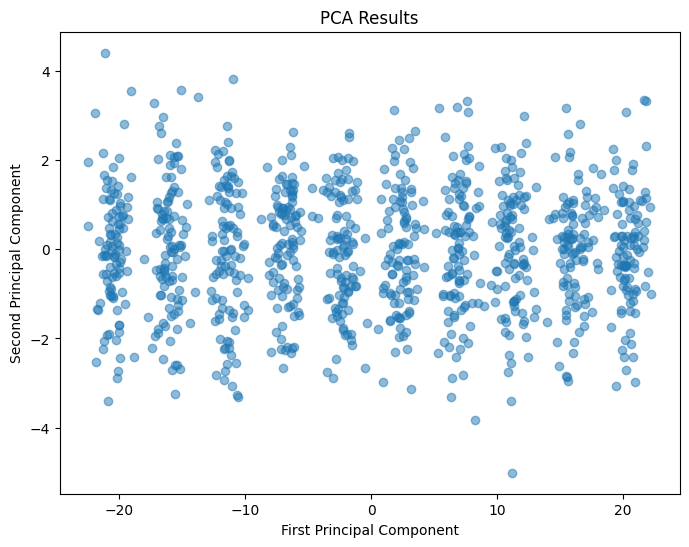

In [12]:
# ## DO NOT MODIFY ##
# Calling all of the created functions and plotting a 2D graph of the new 'data points'
X = pre_process(X)
X_2d = my_PCA(X)
# check out the shape and scatter plot the points
print(X_2d.shape)
#label the scatter plot with the feature names
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.5) 
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Results')
plt.show()

## Part 2: K-means

#### 2.1 Initialisation (5 marks)
Implement a function which randomly initialises centroids. Please note, the data is one of the input variables for a reason.

In [13]:
# input:
# - k: number of centers
# - X: the data
# output:
# - centroids is a k by 2 
def initialise_centroids(X,k):    
    # Write your code here
    #i will randomly select k points from the data as the initial centroids.
    m = X.shape[0]
    random_indices = np.random.choice(m, k, replace=False) # i am using replace=False so that the same point is not selected multiple times
    centroids = X[random_indices] 
    return centroids


Code to call and display ten randomly created centroids. If you get ten rainbow dots, you are on the right track.

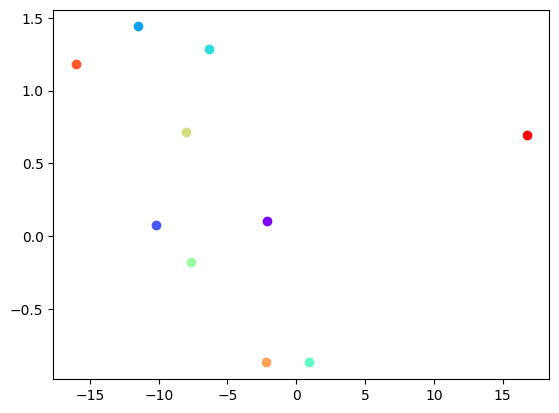

In [14]:
# ## DO NOT MODIFY ##
centroids = initialise_centroids(X_2d, 10) #intialized the centroids

# the code below will plot the centroids
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(centroids))))
for c in centroids:
    plt.scatter(c[0], c[1], color=next(colors))

#### 2.2 Assigning Points to Centroids (5 marks)
Implement a function that takes the matrix X and a set of centroids and assigns each point in X to one of the provided centroids.

In [34]:
from scipy.spatial.distance import cdist
# input:
# - X is a m by 2 point 
# - centroids is a k by 2 , the center of k clusters.
# output:
# - cluster_assignments is an m by 1 vector. the id of the cluster for each point in X
def assign(X,centroids):
    # Write your code here
    distances = np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments

Code to assign each of the points from the post-PCA data a relevant centroid.

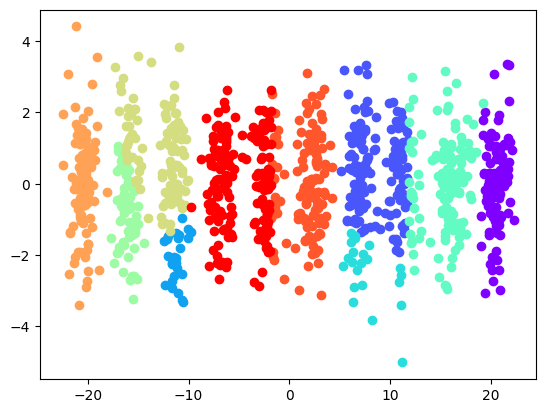

In [38]:
# ## DO NOT MODIFY ##
cluster_assignments = assign(X_2d, centroids)

# the code below will plot the points color-coded according to their cluster
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(centroids))))
for k in np.unique(cluster_assignments):
    plt.scatter(X_2d[cluster_assignments==k,0], X_2d[cluster_assignments==k,1], color=next(colors))

#### 2.3 K-Means Cost Function (5 marks)
Implement a function to compute the value of a cost function given a set of centroids and assignments 

In [39]:
# input:
# - X is a m by 2 point 
# - centroids is a k by 2 , the center of k clusters.
# - cluster_assignments is an m by 1 vector. the id of the cluster for each point in X
# output:
# - cost is the overall 'cost' of the current assignments

def cost(X, cluster_assignments, centroids):
    m = X.shape[0]
    total_cost = 0 
    for i in range(m):
        centroid = centroids[cluster_assignments[i]]
        total_cost += np.sum((X[i] - centroid) ** 2)
    return total_cost


Code (assuming 10 centroids) which assigns each cluster and generates the equivalent cost.

In [40]:
# ## DO NOT MODIFY
k=10
centroids = initialise_centroids(X_2d, k)
cluster_assignments = assign(X_2d, centroids)
c = cost(X_2d,cluster_assignments,centroids)
print(c)

6121.662887068072


#### 2.4 Putting it all together (20 marks)
Implement a function to perform the k-means algorithm using the functions you implemented above.

- 20 marks for a correct manual implementation (you may use numpy functions - except PCA of course)
- 5 marks for a library call

In [24]:
# input:
# - X is a m by 2 list of points 
# - k is the required number of centroids
# - num_of_iterations is the number of times the k-means algorithm will run before 'giving up'
# output:
# - cluster_assignments is a m x 1 for each point in X, which cluster it belongs to
# - centroids is a k x 2 matrix detailing the centroids of each cluster
def My_Kmeans(X,k,num_of_iterations):
    # Write your code here
    centroids = initialise_centroids(X,k)

    for _ in range(num_of_iterations):
        cluster_assignments = assign(X, centroids)

        new_centroids = np.array([X[cluster_assignments == j].mean(axis=0) for j in range(k)])

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
        
    return cluster_assignments, centroids
 

Code to run and test the final algorithm with 10 clusters, 1000 iterations. If you get ten blobs each of which is a different colour, you are on the right track.

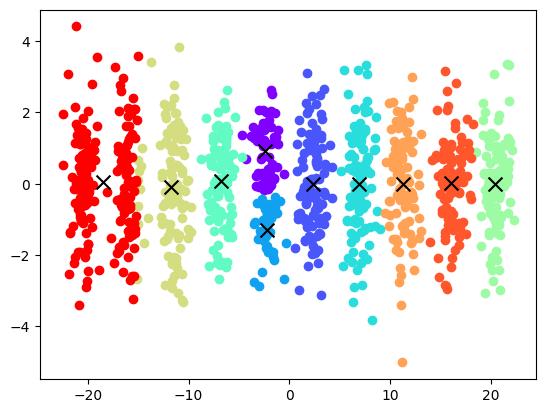

In [23]:
k = 10
centroids = []
cluster_assignments , centroids = My_Kmeans(X_2d,k,1000)

# the code below will plot the points color-coded according to their cluster
colors = iter(plt.cm.rainbow(np.linspace(0, 1, k)))
for k in np.unique(cluster_assignments):
    plt.scatter(X_2d[cluster_assignments==k,0], X_2d[cluster_assignments==k,1], color=next(colors))
    plt.scatter(centroids[k][0],centroids[k][1],marker="x",s=100,c='k')

Clustering according to the data's true clusters.

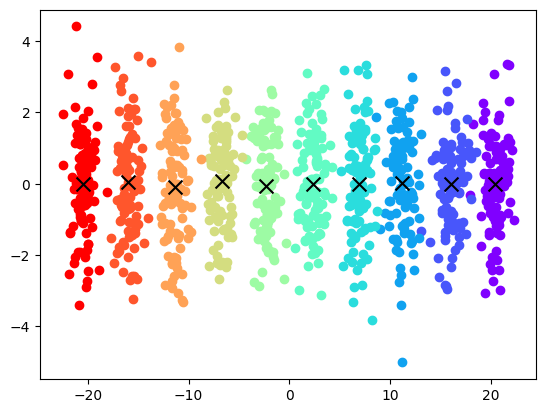

In [22]:
k = 10
cluster_assignments = load_data("./dataset/True_clusters_IDs.csv")
centroids = []
for idx in range(k):            
    temp_cent = X_2d[cluster_assignments==idx].mean(axis=0)             
    centroids.append(temp_cent)
            
# the code below will plot the points color-coded according to their cluster
colors = iter(plt.cm.rainbow(np.linspace(0, 1, k)))
for k in range(k):
    plt.scatter(X_2d[cluster_assignments==k,0], X_2d[cluster_assignments==k,1], color=next(colors))
    plt.scatter(centroids[k][0],centroids[k][1],marker="x",s=100,c='k')

# Part 3 (50 Marks)

You will use the data provided in the **"Dataset2.xlxs"** file in Part 3 of the assignment. The dataset consists of 13611 samples belonging to seven different classes. Each sample has 16 features. 

* Objective: Using the provided dataset, develop a seven class classification method.

* Evaluation Criteria: Your points will be based on the final **average accuracy** achieved by your method in a **10-fold cross validation** framework.

    * 25 marks for achieving a classification accuracy above 82% and upto 87.92%         
    * 40 marks for achieving a classification accuracy above 87.92% and up to 90.0%  
    * 45 marks for achieving a classification accuracy above 90.0% and upto 93.13% 
    * 50 marks for achieving a classification accuracy above 93.13%.     

* You have the freedom to employ any pre-processing, classifiers, and 
post-processing pipeline that you find applicable. Feel free to experiment with 
a wide range of machine learning methods to improve the performance of your system. 

* Your claims and results must be reproducable. 

* To ensure the reproducibility of your results and claims, it is essential that you save both your trained models, hyperparameter specifications,  and the random seeds used throughout your experiments. Saving your models will allow reproducing the achieved accuracy, and recording the random seeds will help validate any randomness in your processes.

#### To perform Q3 i will use XGBoost as the classifier because it is a powerful and flexible machine learning algorithm that is widely used for classification tasks. It is known for its high performance and accuracy, making it a suitable choice for this multiclass classification problem.



In [28]:
!pip install pandas numpy scikit-learn xgboost joblib openpyxl #installing the required libraries

In [1]:
#lets first import the libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost as xgb
import joblib
import warnings
import random
import os
warnings.filterwarnings("ignore")

In [4]:
#to perform Q3 i will create a class for the multiclass classifier
#first i will set the seeds for reproducibility
def set_seeds(seed=42) -> None:
    '''
    This function sets the seeds for reproducibility
    seed: the seed to set
    output: None
    '''
    np.random.seed(seed)
    random.seed(seed)

#now i will create a class for the multiclass classifier
class MultiClassClassifier:
    def __init__(self, random_state=42): #constructor for the class
        self.random_state = random_state
        set_seeds(random_state)
        self.model = None #i am initializing the model as None
        
    def load_and_preprocess_data(self, file_path) -> tuple[pd.DataFrame, pd.Series]:
        """This function loads and preprocesses the Excel dataset"""
        df = pd.read_excel(file_path) 
        X = df.iloc[:, :-1]  # I will take all the columns except the last one as the features
        y = df.iloc[:, -1]   # I will take the last column as the target
        return X, y
    
    def create_model(self) -> Pipeline:
        """This function creates a pipeline with preprocessing and model"""
        #i will create a preprocessing pipeline that will scale the data, I'm using RobustScaler because it is less sensitive to outliers than StandardScaler and using slice to apply it to all the features
        preprocessor = ColumnTransformer(
            transformers=[
                ('transformer', RobustScaler(), slice(0, 16))  # I am applying the scaler to all the features and used 'transformer' as the name of the transformer
            ])
        #now i will create the model, I'm using XGBoost as the classifier and i'm using the optimized parameters for it
        #i checked on google and found the optimized parameters for XGBoost as follows:
        xgb_model = xgb.XGBClassifier(
            n_estimators=1000, #n_estimators is the number of trees in the model
            max_depth=6, #max_depth is the maximum depth of the trees
            learning_rate=0.01, #learning_rate is the learning rate of the model
            subsample=0.8, #subsample is the fraction of the training data to be used for each tree
            colsample_bytree=0.8, #colsample_bytree is the fraction of the features to be used for each tree
            min_child_weight=3, #min_child_weight is the minimum sum of weights of all non-leaf nodes
            gamma=0.1, #gamma is the minimum loss reduction required to make a split
            random_state=self.random_state, #random_state is the seed for the random number generator
            n_jobs=-1, #n_jobs is the number of jobs to run in parallel
        )
        
        #now i will create a pipeline that will first apply the preprocessing and then the model
        self.model = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', xgb_model)
        ])
        
        return self.model
    
    #now i will create a function to evaluate the model using stratified k-fold cross-validation. stratified k-fold cross-validation is used to ensure that distribution of target classes in the training and testing data is same as in the original data.
    def evaluate_model(self, X, y, n_folds=10) -> np.ndarray:
        """This function evaluates the model using stratified k-fold cross-validation"""
        skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=self.random_state) #i am creating a stratified k-fold cross-validation object
        
        #now i will perform the cross-validation
        cv_scores = cross_val_score(
            self.model, 
            X, 
            y, 
            cv=skf, 
            scoring='accuracy',
            n_jobs=-1
        )
        
        return cv_scores #i am returning the cross-validation scores
    
    def train_final_model(self, X, y):
        """This function trains the final model on all the data"""
        self.model.fit(X, y)
        
    def save_model(self, model_path):
        """This function saves the trained model"""
        joblib.dump(self.model, model_path)
        
    def load_model(self, model_path):
        """This function loads the trained model"""
        self.model = joblib.load(model_path)

def main():
    #now i am initializing the classifier
    classifier = MultiClassClassifier(random_state=42)
    
    #loading the data
    X, y = classifier.load_and_preprocess_data("./dataset/Dataset2.xlsx")
    
    #creating the model
    model = classifier.create_model()
    
    #i am evaluating the model.
    cv_scores = classifier.evaluate_model(X, y)
    
    #printing the cross-validation scores
    print("\nCross-validation scores:", cv_scores)
    print(f"Average accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # finally i will train the final model on all the data
    classifier.train_final_model(X, y)
    
    # saving the model
    classifier.save_model("final_model.joblib")
    
    # i am splitting the data into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    #now at last i will train the model on the training data and evaluate it on the test data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #now i will print the accuracy and the classification report
    print("\nTest Set Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

In [5]:
if __name__ == "__main__":
    main()


Cross-validation scores: [0.91697281 0.93240265 0.92946363 0.93754592 0.92578986 0.93754592
 0.93681117 0.92872888 0.92578986 0.93901543]
Average accuracy: 0.9310 (+/- 0.0133)

Test Set Evaluation:
Accuracy: 0.9360764144011756

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       405
           1       0.96      0.91      0.93       265
           2       1.00      1.00      1.00       104
           3       0.94      0.94      0.94       326
           4       0.97      0.96      0.97       386
           5       0.90      0.88      0.89       527
           6       0.92      0.94      0.93       709

    accuracy                           0.94      2722
   macro avg       0.95      0.94      0.95      2722
weighted avg       0.94      0.94      0.94      2722

